In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import numpy as np
from sklearn import tree
from sklearn import preprocessing, model_selection
from sklearn import metrics
from scipy import stats
from scipy.stats import norm


from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


%matplotlib inline

# Automóveis


## Leitura da Base 

In [2]:
df_auto = pandas.read_csv('../Data/dataset_auto.csv',sep=';')
df_auto['model'] = df_auto['brand'].astype(str) + df_auto['model'].astype(str)

auto_target_col = 'price'

drop_cols = ['brand','tax']
df_auto.drop(drop_cols, axis=1, inplace=True)
print(df_auto.shape)
df_auto.head()

(15000, 8)


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,audi A1,2020,20000,Manual,5000,Petrol,49.6,1.0
1,audi A5,2017,19995,Semi-Auto,54000,Diesel,67.3,2.0
2,audi A3,2017,11895,Manual,28334,Petrol,62.8,1.0
3,audi Q7,2018,56900,Semi-Auto,5330,Diesel,39.2,4.0
4,audi A4,2019,27160,Semi-Auto,17790,Diesel,47.9,2.0


# Transformação Variáveis Categóricas

In [3]:
categorical_cols = ['transmission', 'fuelType', 'model']
encoder_map = {}

for cname in categorical_cols:
    encoder = preprocessing.OneHotEncoder(sparse=False)
    transformed = encoder.fit_transform(df_auto[[cname]])
    ohe_df = pandas.DataFrame(transformed, columns=[cname+'_'+cat for cat in encoder.categories_[0]])
    encoder_map[cname] = encoder
    
    df_auto = pandas.concat([df_auto, ohe_df], axis=1).drop(cname, axis=1)
df_auto.head()

,year,price,mileage,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,...,model_ford Ka+,model_ford Kuga,model_ford Mondeo,model_ford Mustang,model_ford Puma,model_ford S-MAX,model_ford Streetka,model_ford Tourneo Connect,model_ford Tourneo Custom,model_ford Transit Tourneo
0,2020,20000,5000,49.6,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,19995,54000,67.3,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,11895,28334,62.8,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,56900,5330,39.2,4.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,27160,17790,47.9,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Treinamento do Modelo 

In [4]:

Y = df_auto[auto_target_col]
X = df_auto.drop(auto_target_col, axis=1)

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[auto_target_col] = ytrain
df_test[auto_target_col] = ytest


model_auto = tree.DecisionTreeRegressor(criterion='mse', max_depth = 10)
model_auto.fit(xtrain, ytrain)      
df_train['prediction'] = model_auto.predict(xtrain)
df_test['prediction']  = model_auto.predict(xtest)

df_auto = pandas.concat((df_train, df_test), axis=0)

## Curva de Resíduos

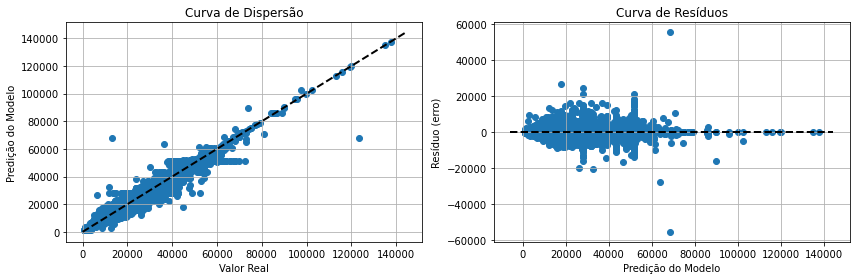

In [5]:
plt.figure(figsize=(12,4))

# Dispersion plot
plt.subplot(1,2,1)
plt.scatter(df_auto[auto_target_col], df_auto['prediction'])
plt.plot([0, plt.gca().axis()[3]],[0, plt.gca().axis()[3]],  '--k', lw=2)
plt.grid()
plt.ylabel('Predição do Modelo')
plt.xlabel('Valor Real')
plt.title(f'Curva de Dispersão')
plt.tight_layout()

plt.subplot(1,2,2)
error = df_auto[auto_target_col] - df_auto['prediction']
plt.scatter(df_auto['prediction'], error)
plt.plot([plt.gca().axis()[0], plt.gca().axis()[1]],[0, 0],  '--k', lw=2)
plt.grid()
plt.ylabel('Resíduo (erro)')
plt.xlabel('Predição do Modelo')
plt.title(f'Curva de Resíduos')
plt.tight_layout()

## Teste de Normalidade do Erro 

mu = -2.46 and sigma = 2736.84
Shapiro-Wilk p-value: 0.0


C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\envs\infnet-ead\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\envs\infnet-ead\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


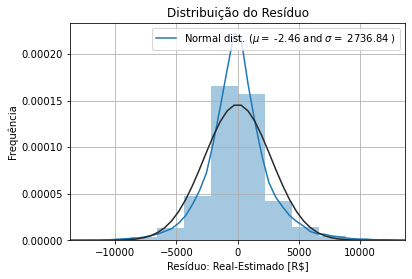

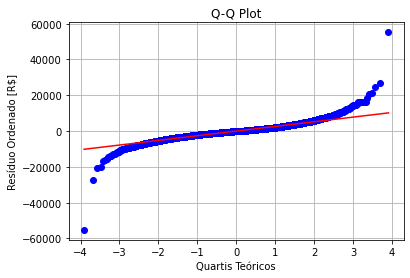

In [6]:

error = df_auto[auto_target_col] - df_auto['prediction']
(mu, sigma) = norm.fit(error.values.reshape((-1, 1)))
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
_, p_value = stats.shapiro(error)
print('Shapiro-Wilk p-value: ' + str(p_value))
# Get the fitted parameters used by the function
sns.distplot(error , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequência')
plt.xlabel('Resíduo: Real-Estimado [R$]')
plt.title(f'Distribuição do Resíduo')
plt.xlim((mu-5*sigma, mu+5*sigma))
plt.grid(True)
plt.show()
#Get also the QQ-plot
res = stats.probplot(error, plot=plt)
plt.xlabel('Quartis Teóricos')
plt.title(f'Q-Q Plot')
plt.ylabel('Resíduo Ordenado [R$]')
plt.grid(True)
plt.show()


## Métricas de Regressão

In [7]:
def print_regression_report(ytrue, ypred, dset):
    def mape(y, yhat):
        return np.mean(np.abs((y - yhat) / y)) * 100
    
    
    measurement_dict = {
        'mean_absolute_error': metrics.mean_absolute_error(ytrue, ypred),
        'mean_squared_error': metrics.mean_squared_error(ytrue, ypred),
        'root_mean_squared_error': np.sqrt(metrics.mean_squared_error(ytrue, ypred)),
        'median_absolute_error': metrics.median_absolute_error(ytrue, ypred),
        'r2': metrics.r2_score(ytrue, ypred),
        'mean_absolute_percentage_error': mape(ytrue, ypred),
    }
    df =  pandas.DataFrame.from_dict(measurement_dict, orient='index')
    df.columns=[dset]
    return df
   
print_regression_report(df_auto[auto_target_col], df_auto['prediction'], 'auto')

,auto
mean_absolute_error,1.844605e+03
mean_squared_error,7.490286e+06
root_mean_squared_error,2.736839e+03
median_absolute_error,1.276157e+03
r2,9.385105e-01
mean_absolute_percentage_error,1.057486e+01


#  Clima

## Leitura da Base 

In [8]:
df_weather = pandas.read_csv('../Data/dataset_clima.csv',sep=';')

drop_cols = ['Temperature (C)']
df_weather.drop(drop_cols, axis=1, inplace=True)

print(df_weather.shape)

weather_target_col = 'Apparent Temperature (C)'

df_weather.head()

(4019, 7)


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000
1,-0.174537,0.817083,21.229192,142.750000,11.348487,0.0,1011.985000
2,1.808796,0.847083,17.824713,164.583333,8.492079,0.0,1010.384167
3,0.445370,0.897083,7.726658,252.541667,9.223958,0.0,1021.170833
4,-0.663194,0.906667,12.152817,35.000000,8.352546,0.0,981.770833


## Treinamento do Modelo 

In [9]:

Y = df_weather[weather_target_col]
X = df_weather.drop(weather_target_col, axis=1)

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[weather_target_col] = ytrain
df_test[weather_target_col] = ytest


model_weather = tree.DecisionTreeRegressor(criterion='mse', max_depth = 10)
model_weather.fit(xtrain, ytrain)      
df_train['prediction'] = model_weather.predict(xtrain)
df_test['prediction']  = model_weather.predict(xtest)

df_weather = pandas.concat((df_train, df_test), axis=0)

## Curvas de Resíduo 

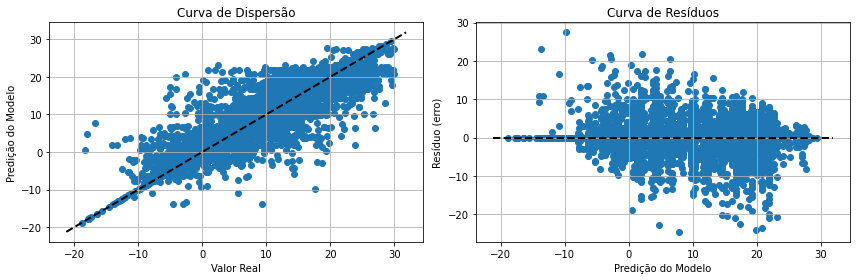

In [10]:
plt.figure(figsize=(12,4))

# Dispersion plot
plt.subplot(1,2,1)
plt.scatter(df_weather[weather_target_col], df_weather['prediction'])
plt.plot([plt.gca().axis()[2], plt.gca().axis()[3]],
         [plt.gca().axis()[2], plt.gca().axis()[3]],  '--k', lw=2)
plt.grid()
plt.ylabel('Predição do Modelo')
plt.xlabel('Valor Real')
plt.title(f'Curva de Dispersão')
plt.tight_layout()

plt.subplot(1,2,2)
error = df_weather[weather_target_col] - df_weather['prediction']
plt.scatter(df_weather['prediction'], error)
plt.plot([plt.gca().axis()[0], plt.gca().axis()[1]],[0, 0],  '--k', lw=2)
plt.grid()
plt.ylabel('Resíduo (erro)')
plt.xlabel('Predição do Modelo')
plt.title(f'Curva de Resíduos')
plt.tight_layout()

# Teste de Normalidade do Erro 

mu = 0.06 and sigma = 4.96
Shapiro-Wilk p-value: 2.870437022165598e-30


C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\envs\infnet-ead\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


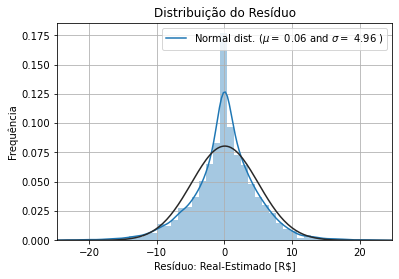

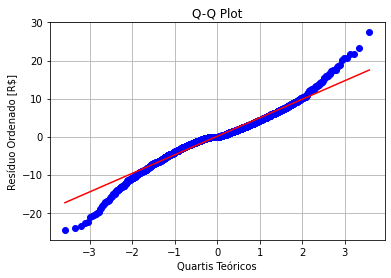

In [11]:
error = df_weather[weather_target_col] - df_weather['prediction']
(mu, sigma) = norm.fit(error.values.reshape((-1, 1)))
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
_, p_value = stats.shapiro(error)
print('Shapiro-Wilk p-value: ' + str(p_value))
# Get the fitted parameters used by the function
sns.distplot(error , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequência')
plt.xlabel('Resíduo: Real-Estimado [R$]')
plt.title(f'Distribuição do Resíduo')
plt.xlim((mu-5*sigma, mu+5*sigma))
plt.grid(True)
plt.show()
#Get also the QQ-plot
res = stats.probplot(error, plot=plt)
plt.xlabel('Quartis Teóricos')
plt.title(f'Q-Q Plot')
plt.ylabel('Resíduo Ordenado [R$]')
plt.grid(True)
plt.show()


## Métricas de Regressão 

In [12]:
print_regression_report(df_weather[weather_target_col], df_weather['prediction'], 'weather')

,weather
mean_absolute_error,3.479631
mean_squared_error,24.575666
root_mean_squared_error,4.957385
median_absolute_error,2.479167
r2,0.751188
mean_absolute_percentage_error,169.612131
